In [4]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\ojas2\OneDrive\Desktop\TUF\b.tech\data sciences\practice workbook\google-stock-dataset-Daily.csv")
df.head()

dataset = df[['Close']]

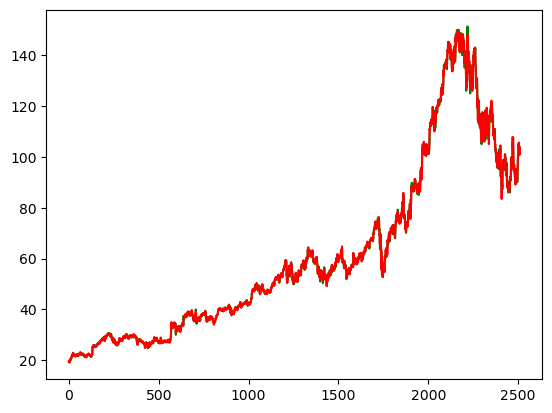

In [5]:
import matplotlib.pyplot as plt
index = df[['Unnamed: 0']]
plt.plot(index, df[['Price']],c = 'green')
plt.plot(index, df[['Close']], c = 'red')
plt.show()

In [20]:
dataset = dataset[:1751]
dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

training_size = int(len(dataset) - 10)
x_train = scaled_data[:training_size - 1:, : ]
x_test = scaled_data[training_size - 1:, : ]
y_train = dataset['Close'][1:training_size]
y_test = dataset['Close'][training_size + 1:]

print(len(x_train))

1740


In [32]:
import numpy as np

y_train = np.array(y_train)
print(type(y_train), type(x_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size =5 , epochs =50 )

Epoch 1/50
348/348 [==============================] - 4s 4ms/step - loss: 185.1582
Epoch 2/50
348/348 [==============================] - 1s 4ms/step - loss: 0.9309
Epoch 3/50
348/348 [==============================] - 2s 5ms/step - loss: 0.8909
Epoch 4/50
348/348 [==============================] - 1s 4ms/step - loss: 0.8168
Epoch 5/50
348/348 [==============================] - 2s 5ms/step - loss: 0.7644
Epoch 6/50
348/348 [==============================] - 2s 4ms/step - loss: 0.7332
Epoch 7/50
348/348 [==============================] - 2s 4ms/step - loss: 0.9373
Epoch 8/50
348/348 [==============================] - 2s 4ms/step - loss: 1.0345
Epoch 9/50
348/348 [==============================] - 1s 4ms/step - loss: 0.9111
Epoch 10/50
348/348 [==============================] - 1s 4ms/step - loss: 0.7699
Epoch 11/50
348/348 [==============================] - 1s 4ms/step - loss: 0.9788
Epoch 12/50
348/348 [==============================] - 1s 4ms/step - loss: 0.8683
Epoch 13/50
348/348 [==

In [66]:
model.save('model_file')

INFO:tensorflow:Assets written to: model_file\assets


INFO:tensorflow:Assets written to: model_file\assets


In [6]:
df_2 = df
X = df_2[['Price', 'High', 'Low']]
y = df_2[['Close']]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
print(len(X_train))

2008


In [18]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape = (3,)),
    tf.keras.layers.Dense(256, activation = 'relu',),
    tf.keras.layers.Dense(128, activation = 'relu',),
    tf.keras.layers.Dense(64, activation = 'relu',),
    tf.keras.layers.Dense(32, activation = 'relu',),
    tf.keras.layers.Dense(1, activation = 'relu',)
])

In [19]:
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_2.fit(X_train, y_train, epochs = 30, batch_size = 10)

Epoch 1/30
201/201 [==============================] - 1s 2ms/step - loss: 85.8490
Epoch 2/30
201/201 [==============================] - 0s 2ms/step - loss: 0.6484
Epoch 3/30
201/201 [==============================] - 0s 2ms/step - loss: 0.9074
Epoch 4/30
201/201 [==============================] - 0s 2ms/step - loss: 1.3729
Epoch 5/30
201/201 [==============================] - 0s 2ms/step - loss: 0.9738
Epoch 6/30
201/201 [==============================] - 0s 1ms/step - loss: 2.5835
Epoch 7/30
201/201 [==============================] - 0s 2ms/step - loss: 1.5990
Epoch 8/30
201/201 [==============================] - 0s 2ms/step - loss: 1.1683
Epoch 9/30
201/201 [==============================] - 0s 2ms/step - loss: 0.8026
Epoch 10/30
201/201 [==============================] - 0s 2ms/step - loss: 2.1012
Epoch 11/30
201/201 [==============================] - 0s 2ms/step - loss: 0.8988
Epoch 12/30
201/201 [==============================] - 0s 1ms/step - loss: 2.2874
Epoch 13/30
201/201 [===

In [90]:
vals = model.predict(x_test)

1/1 [==============================] - 1s 503ms/step


In [91]:
from sklearn.metrics import mean_squared_error

squared_error = mean_squared_error(y_test, vals[:9])
rmse = np.sqrt(squared_error)

print(f"RMSE: {rmse:.4f}")

RMSE: 2.4885


In [92]:
print(squared_error)

6.192789752197485


In [93]:
print(vals, y_test)

[[60.80299 ]
 [55.892452]
 [60.96978 ]
 [53.9621  ]
 [56.211575]
 [54.873417]
 [55.892452]
 [53.721424]
 [53.01875 ]
 [56.80916 ]
 [55.39327 ]] 1741    60.71
1742    53.65
1743    55.90
1744    54.56
1745    55.58
1746    53.41
1747    52.71
1748    56.50
1749    55.08
Name: Close, dtype: float64


In [72]:
test_2 = df[['Close']].iloc[1745:1750]
test_2_fit = scaler.transform(test_2)
print(test_2)

      Close
1745  55.58
1746  53.41
1747  52.71
1748  56.50
1749  55.08


In [73]:
test_2_pred = model.predict(test_2_fit)
print(test_2_pred)

1/1 [==============================] - 0s 23ms/step
[[55.628605]
 [53.45496 ]
 [52.75221 ]
 [56.54762 ]
 [55.128468]]
